Creating Training Coverage Chart...


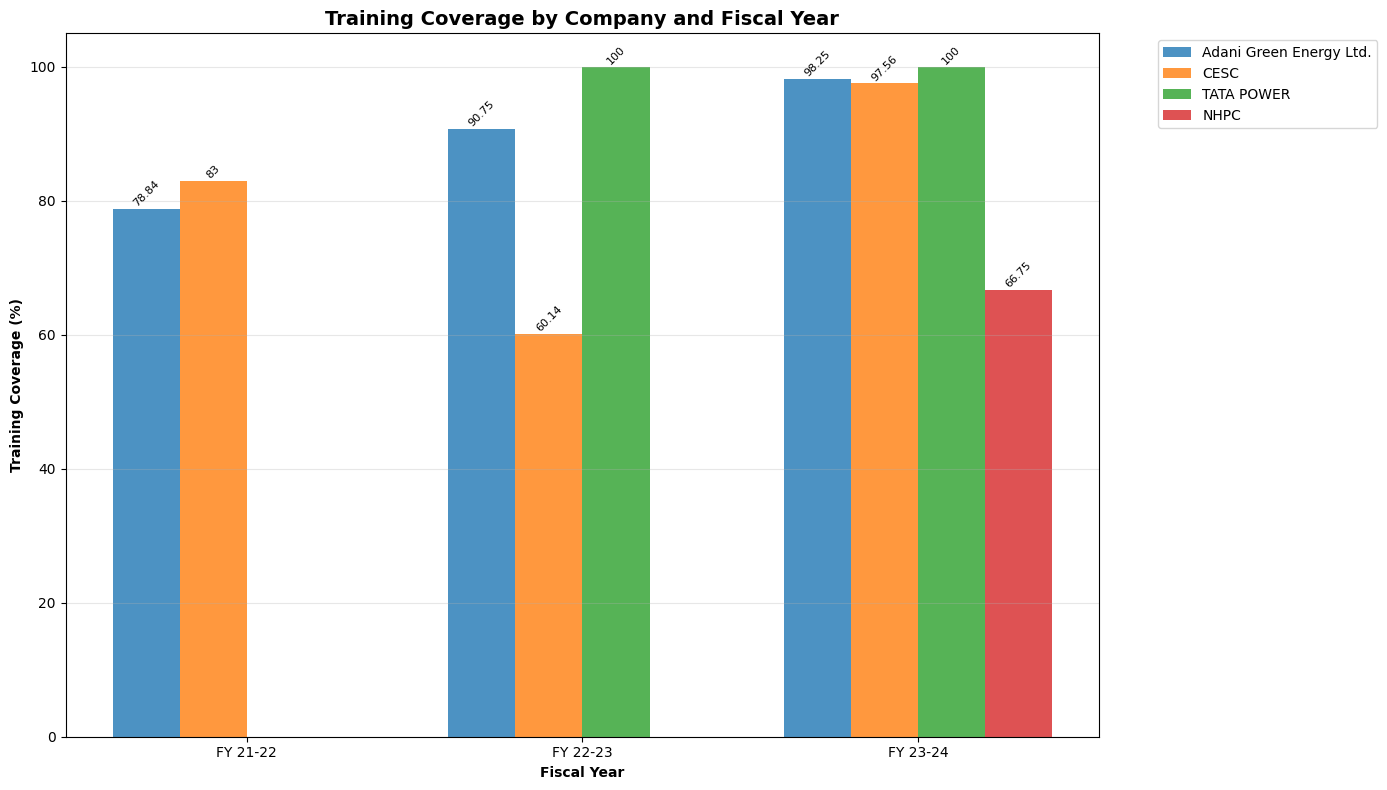


Creating Total Employees Chart...


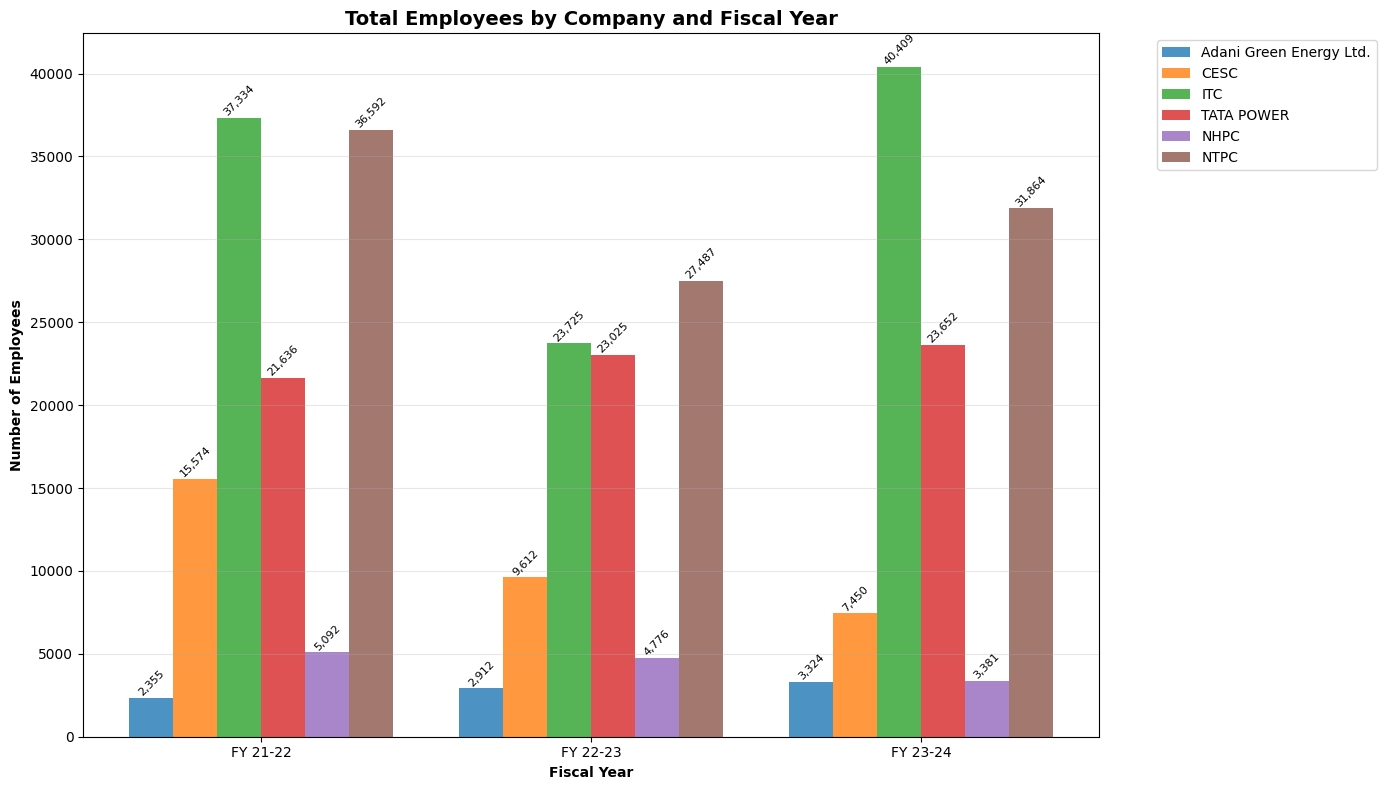


Creating Total Training Hours Chart...


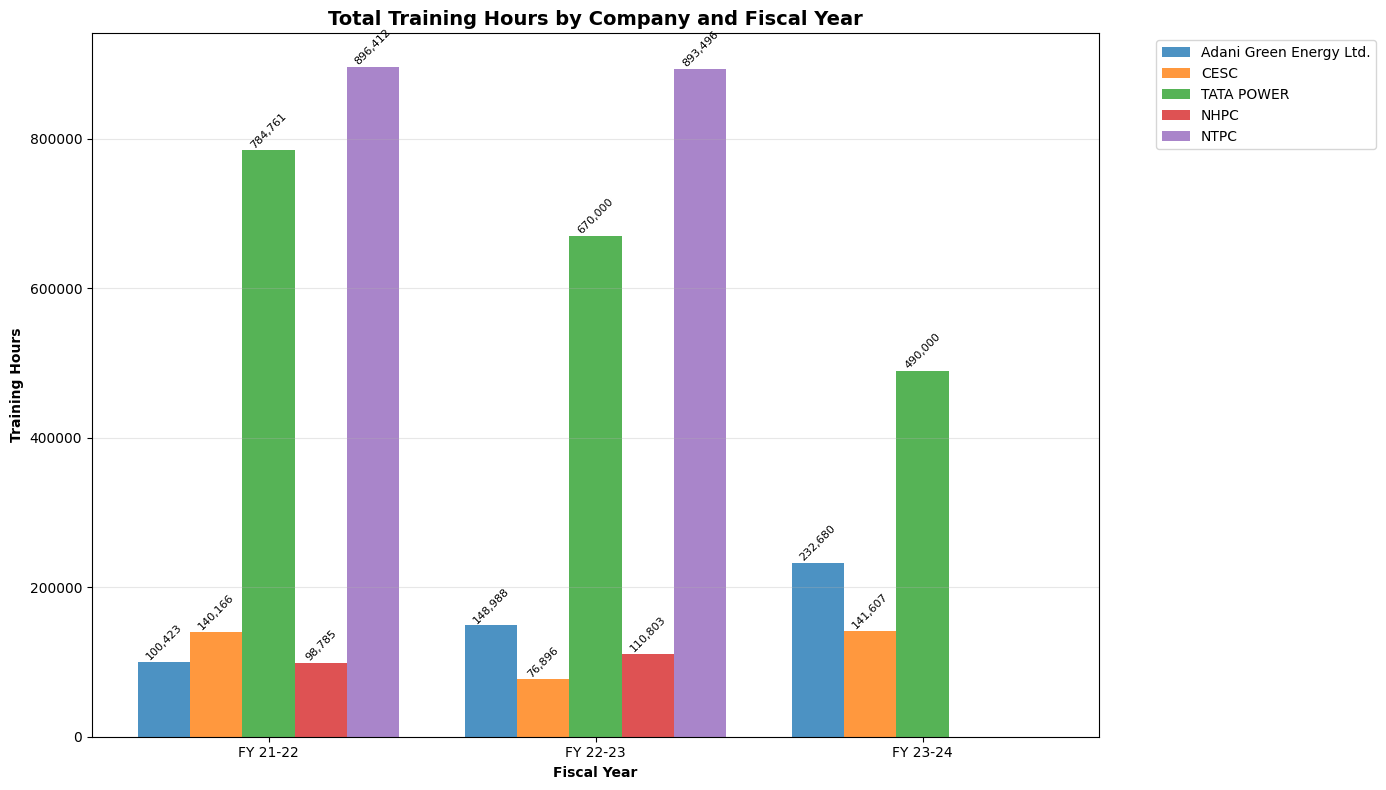


Creating CSR Beneficiaries Chart...


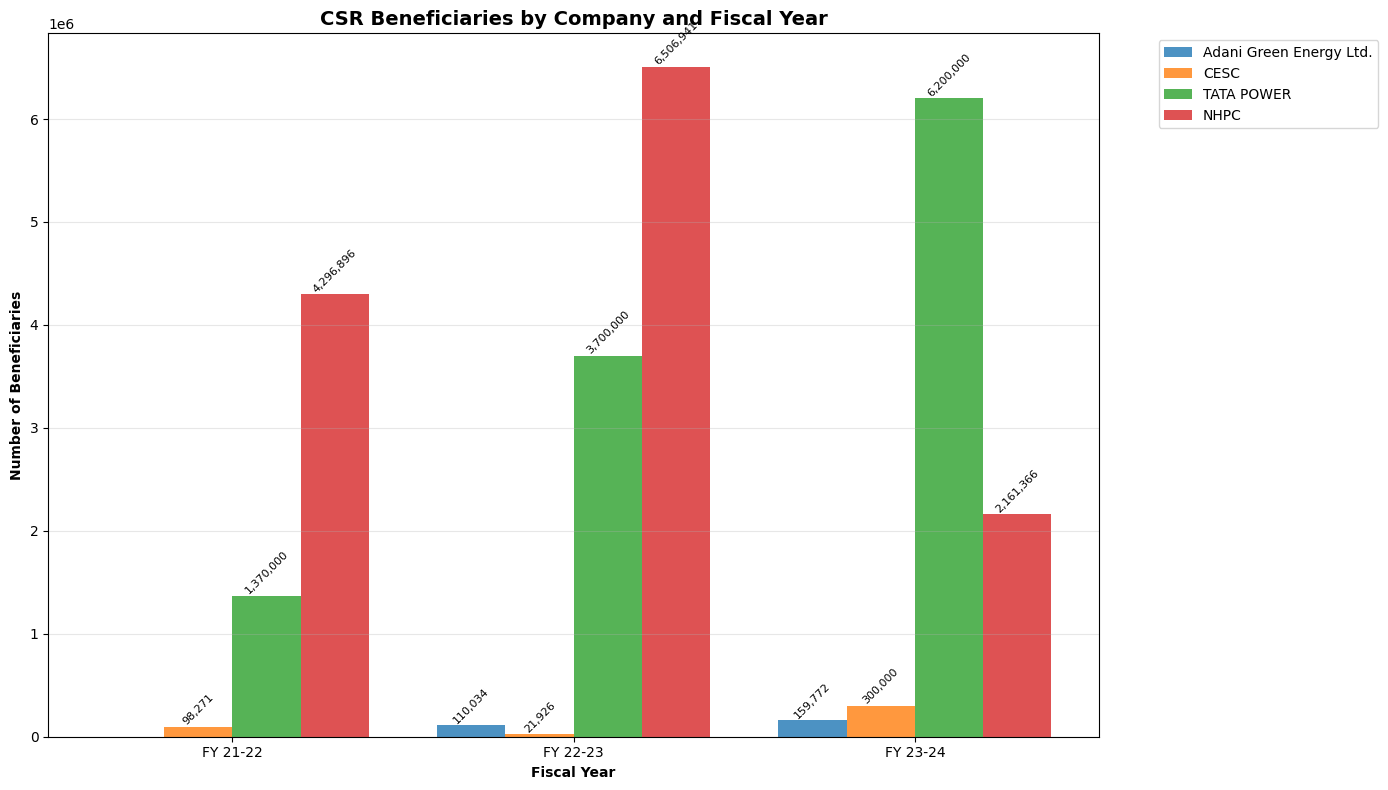


Creating CSR Spend Chart...


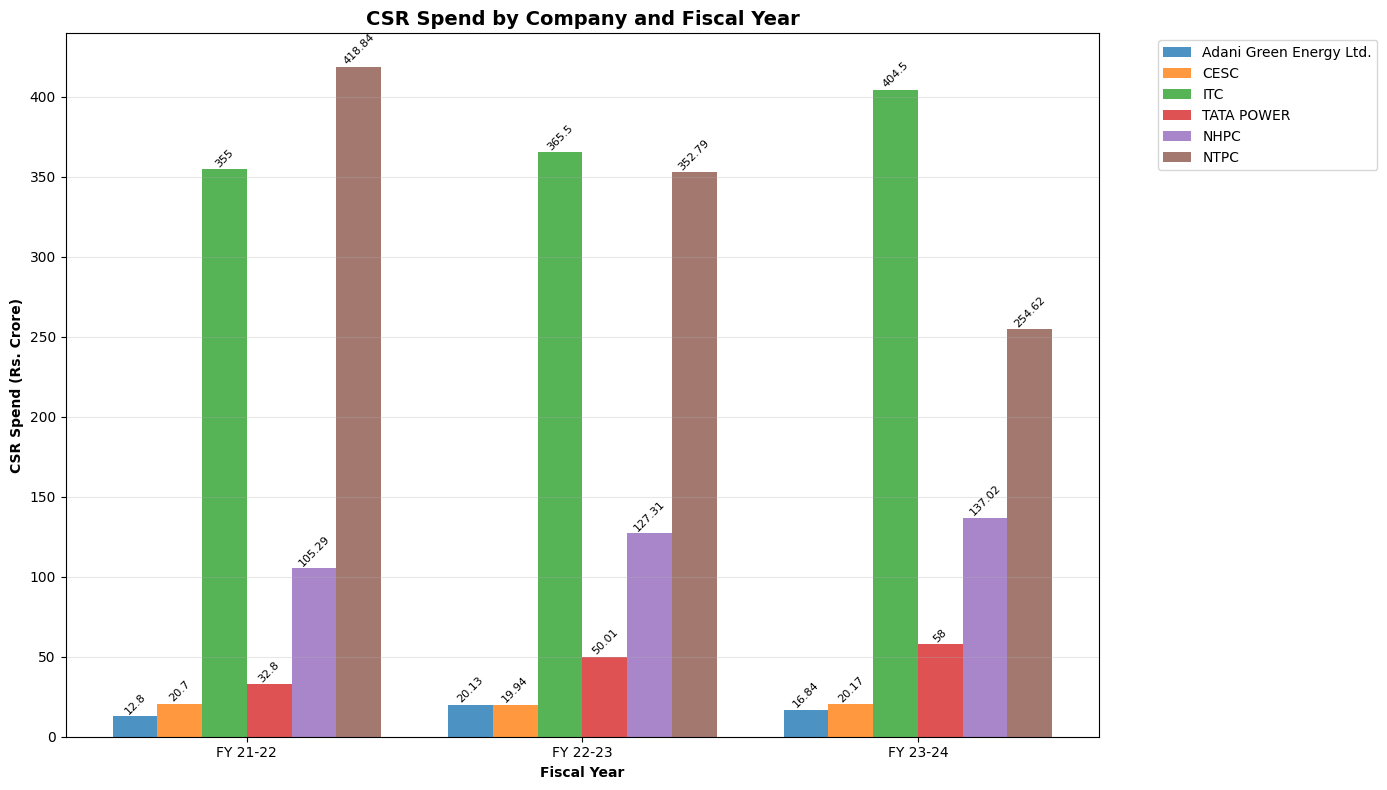


Creating LTIFR Chart...


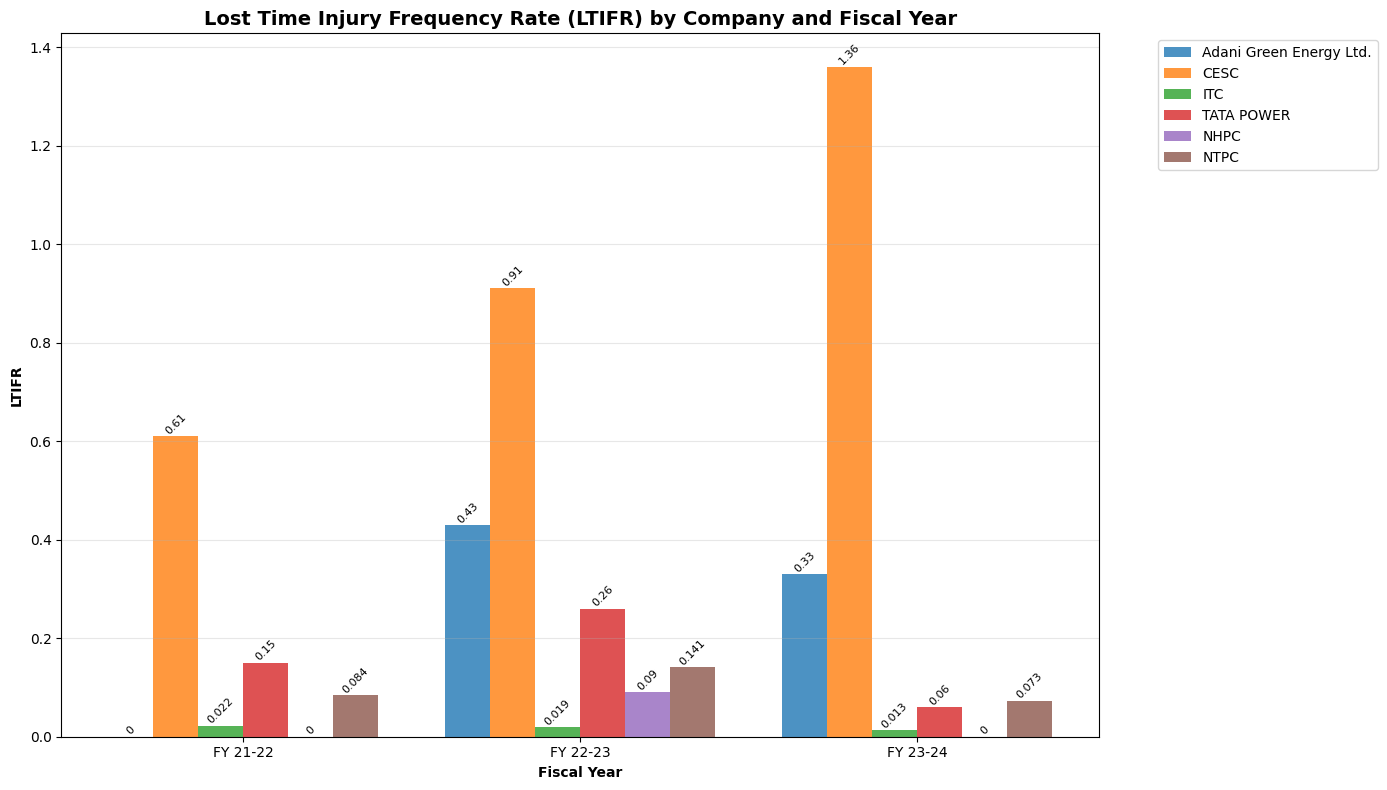


Creating Sustainability Report Years Chart...


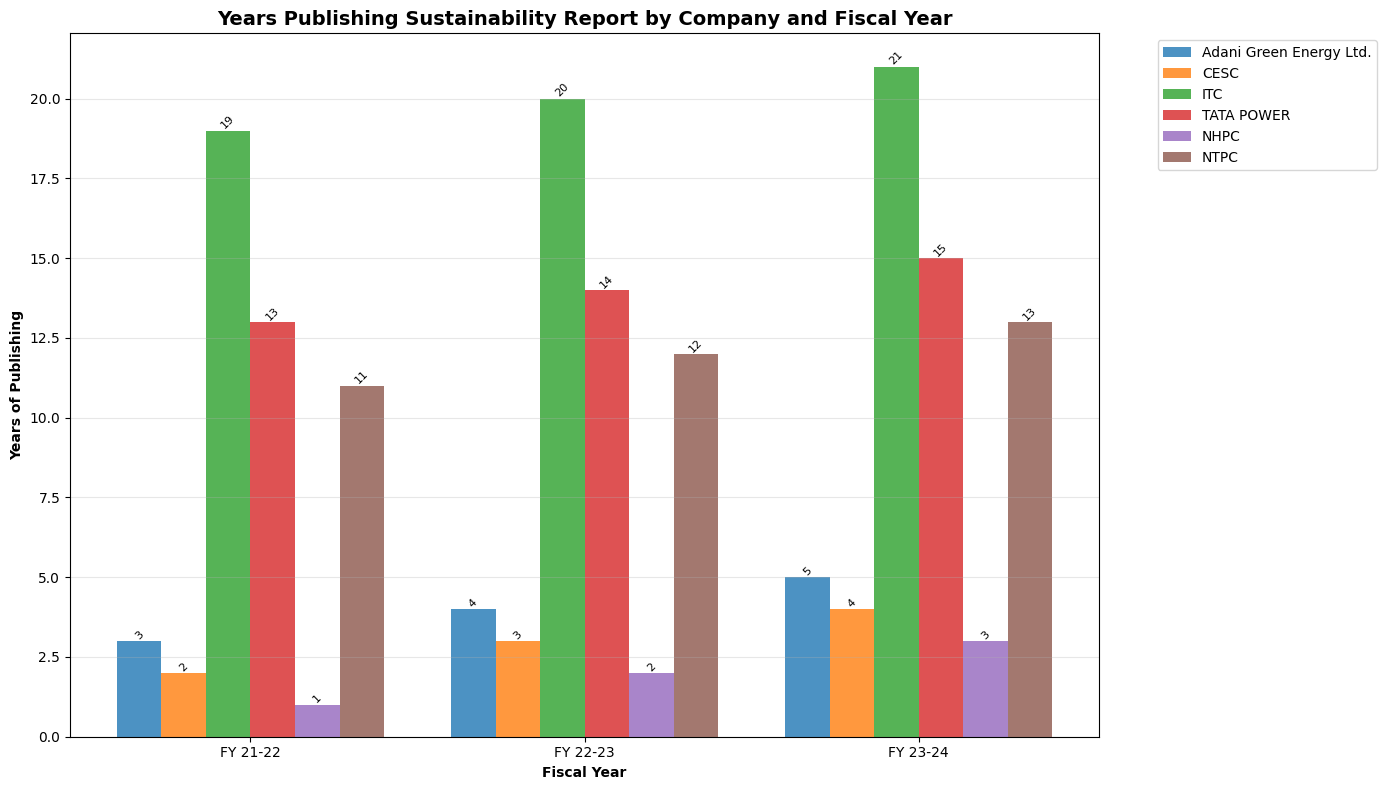


All charts have been generated successfully!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set up the style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Define companies and fiscal years
companies = ['Adani Green Energy Ltd.', 'CESC', 'ITC', 'TATA POWER', 'NHPC', 'NTPC']
fiscal_years = ['FY 21-22', 'FY 22-23', 'FY 23-24']

# Data for each parameter
# Training coverage (%)
training_coverage = {
    'Adani Green Energy Ltd.': [78.84, 90.75, 98.25],
    'CESC': [83, 60.14, 97.56],
    'ITC': [None, None, None],
    'TATA POWER': [None, 100, 100],
    'NHPC': [None, None, 66.75],
    'NTPC': [None, None, None]
}

# Total Employees
total_employees = {
    'Adani Green Energy Ltd.': [2355, 2912, 3324],
    'CESC': [15574, 9612, 7450],
    'ITC': [37334, 23725, 40409],
    'TATA POWER': [21636, 23025, 23652],
    'NHPC': [5092, 4776, 3381],
    'NTPC': [36592, 27487, 31864]
}

# Total Training Hours
training_hours = {
    'Adani Green Energy Ltd.': [100423, 148988, 232680],
    'CESC': [140166, 76896, 141607],
    'ITC': [None, None, None],
    'TATA POWER': [784761, 670000, 490000],
    'NHPC': [98785, 110803, None], # Corrected data for NHPC
    'NTPC': [896412, 893496, None]
}

# CSR Beneficiaries
csr_beneficiaries = {
    'Adani Green Energy Ltd.': [None, 110034, 159772],
    'CESC': [98271, 21926, 300000],
    'ITC': [None, None, None],
    'TATA POWER': [1370000, 3700000, 6200000],
    'NHPC': [4296896, 6506941, 2161366],
    'NTPC': [None, None, None]
}

# CSR Spend (Rs. Crore)
csr_spend = {
    'Adani Green Energy Ltd.': [12.8, 20.13, 16.84],
    'CESC': [20.7, 19.94, 20.17],
    'ITC': [355, 365.5, 404.5],
    'TATA POWER': [32.8, 50.01, 58],
    'NHPC': [105.29, 127.31, 137.02],
    'NTPC': [418.84, 352.79, 254.62]
}

# LTIFR of Employees
ltifr = {
    'Adani Green Energy Ltd.': [0.00, 0.43, 0.33],
    'CESC': [0.61, 0.91, 1.36],
    'ITC': [0.022, 0.019, 0.013],
    'TATA POWER': [0.15, 0.26, 0.06],
    'NHPC': [0, 0.09, 0],
    'NTPC': [0.084, 0.141, 0.073]
}

# Years Publishing Sustainability Report
sustainability_years = {
    'Adani Green Energy Ltd.': [3, 4, 5],
    'CESC': [2, 3, 4],
    'ITC': [19, 20, 21],
    'TATA POWER': [13, 14, 15],
    'NHPC': [1, 2, 3],
    'NTPC': [11, 12, 13]
}

def create_grouped_bar_chart(data, title, ylabel, filename=None):
    """Create a grouped bar chart for the given data"""
    fig, ax = plt.subplots(figsize=(14, 8))

    # Filter out companies with all None values
    filtered_data = {}
    for company, values in data.items():
        if any(v is not None for v in values):
            filtered_data[company] = values

    if not filtered_data:
        print(f"No data available for {title}")
        return

    # Set up the bar positions
    x = np.arange(len(fiscal_years))
    width = 0.8 / len(filtered_data)

    # Create bars for each company
    for i, (company, values) in enumerate(filtered_data.items()):
        # Replace None values with 0 for plotting, but keep track of them
        plot_values = [v if v is not None else 0 for v in values]
        bars = ax.bar(x + i * width, plot_values, width, label=company, alpha=0.8)

        # Add value labels on bars
        for j, (bar, original_value) in enumerate(zip(bars, values)):
            if original_value is not None:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{original_value:,.0f}' if isinstance(original_value, (int, float)) and original_value >= 1000
                       else f'{original_value}' if original_value != 0 else '0',
                       ha='center', va='bottom', fontsize=8, rotation=45)

    ax.set_xlabel('Fiscal Year', fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xticks(x + width * (len(filtered_data) - 1) / 2)
    ax.set_xticklabels(fiscal_years)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Create all the charts
print("Creating Training Coverage Chart...")
create_grouped_bar_chart(training_coverage,
                        'Training Coverage by Company and Fiscal Year',
                        'Training Coverage (%)')

print("\nCreating Total Employees Chart...")
create_grouped_bar_chart(total_employees,
                        'Total Employees by Company and Fiscal Year',
                        'Number of Employees')

print("\nCreating Total Training Hours Chart...")
create_grouped_bar_chart(training_hours,
                        'Total Training Hours by Company and Fiscal Year',
                        'Training Hours')

print("\nCreating CSR Beneficiaries Chart...")
create_grouped_bar_chart(csr_beneficiaries,
                        'CSR Beneficiaries by Company and Fiscal Year',
                        'Number of Beneficiaries')

print("\nCreating CSR Spend Chart...")
create_grouped_bar_chart(csr_spend,
                        'CSR Spend by Company and Fiscal Year',
                        'CSR Spend (Rs. Crore)')

print("\nCreating LTIFR Chart...")
create_grouped_bar_chart(ltifr,
                        'Lost Time Injury Frequency Rate (LTIFR) by Company and Fiscal Year',
                        'LTIFR')

print("\nCreating Sustainability Report Years Chart...")
create_grouped_bar_chart(sustainability_years,
                        'Years Publishing Sustainability Report by Company and Fiscal Year',
                        'Years of Publishing')

print("\nAll charts have been generated successfully!")

Creating Specific Water Consumption Chart...


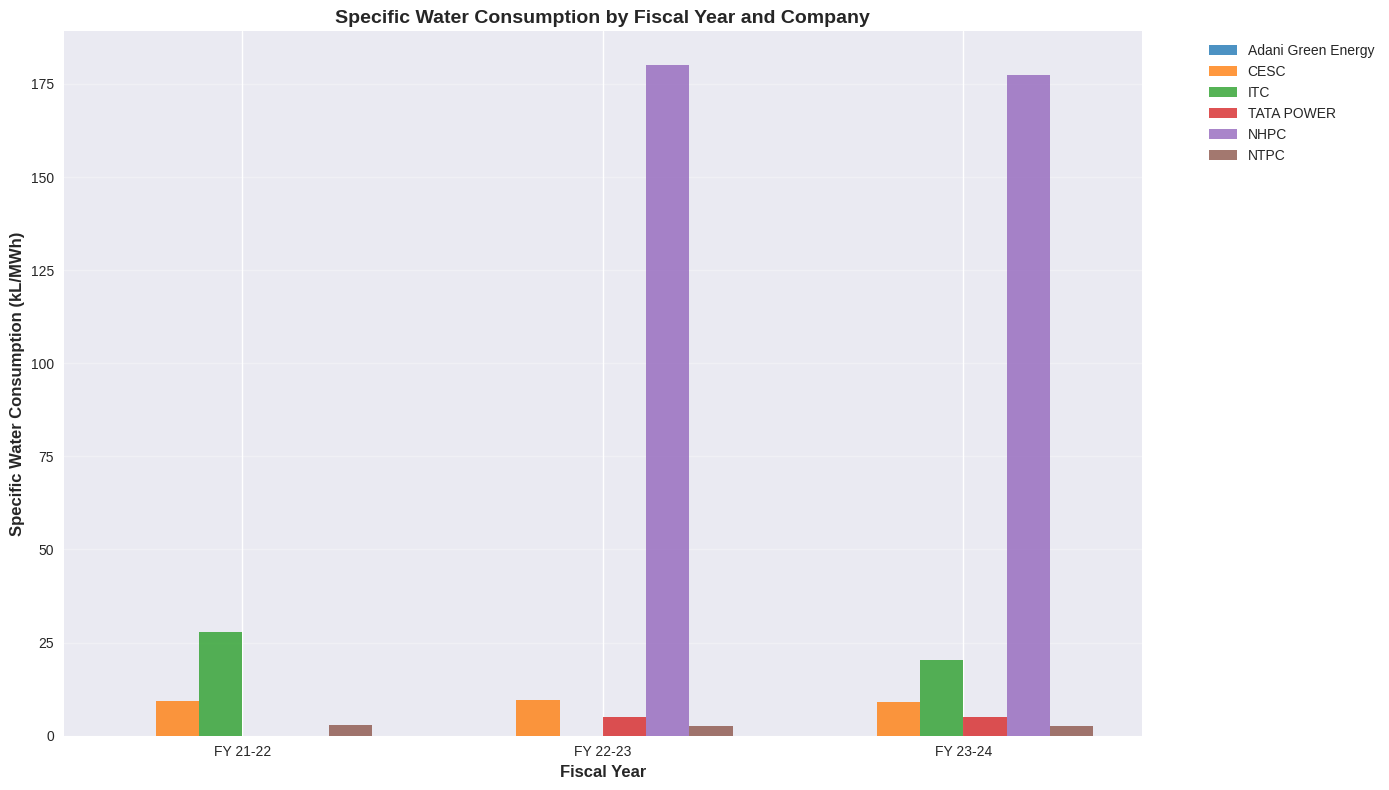


Creating Coal Consumption Chart...


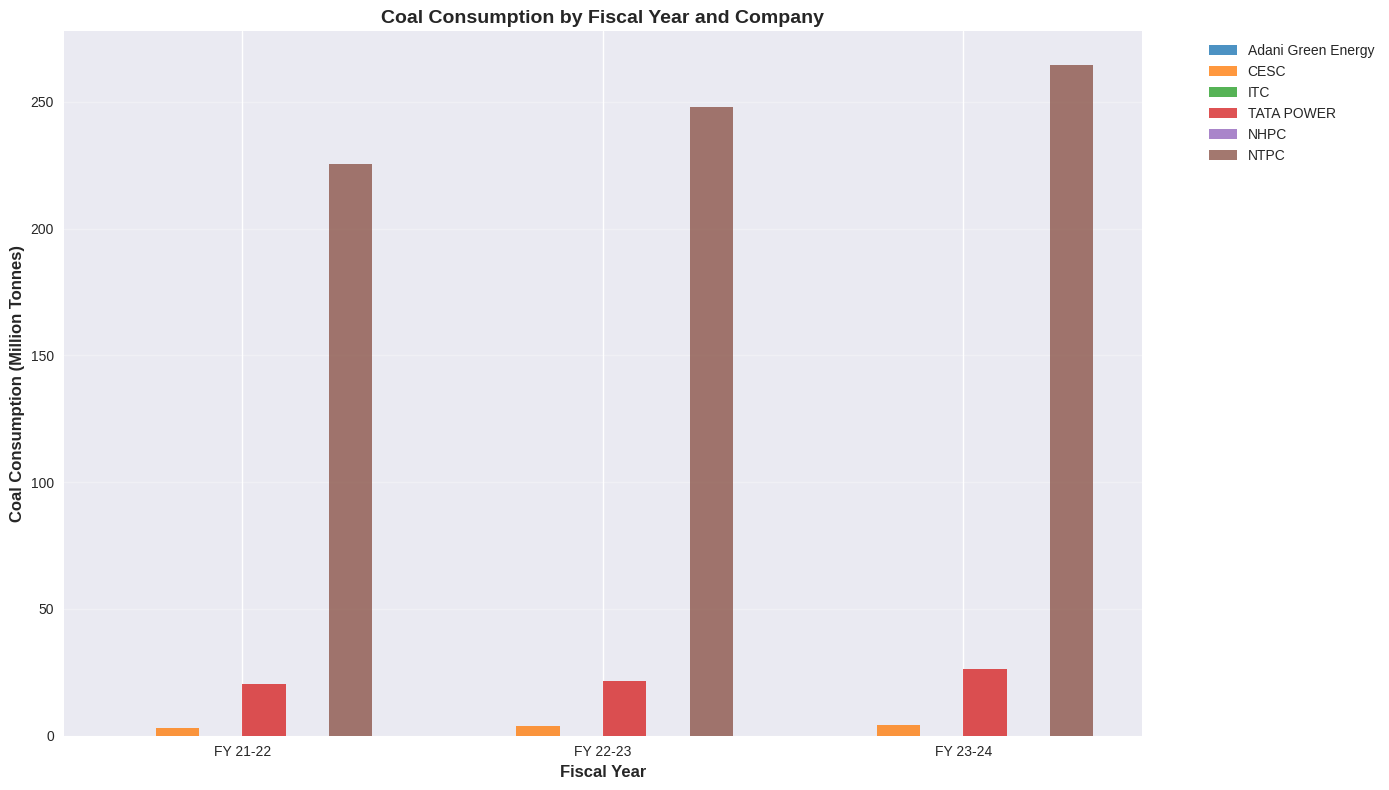


Creating Energy Consumption Chart...


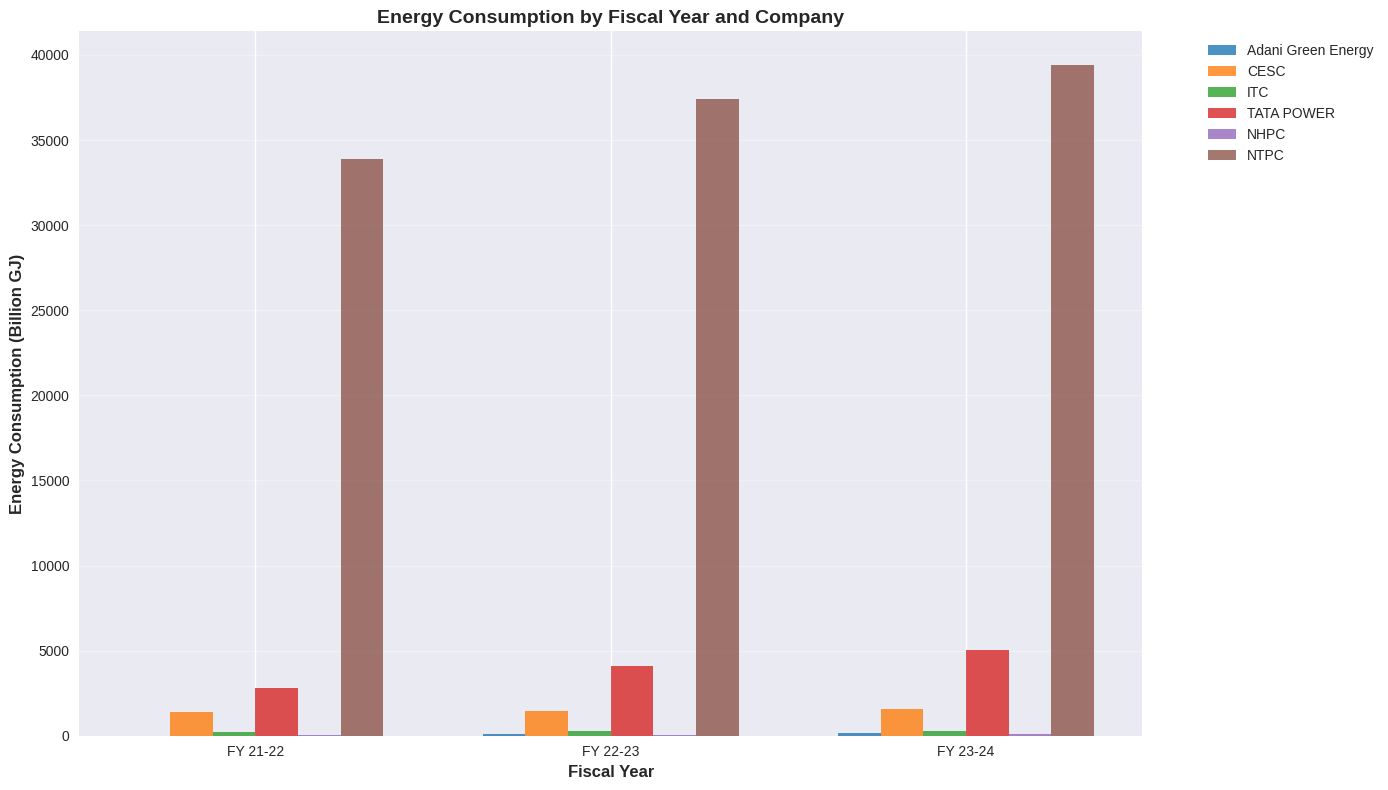


Creating Energy Intensity Chart...


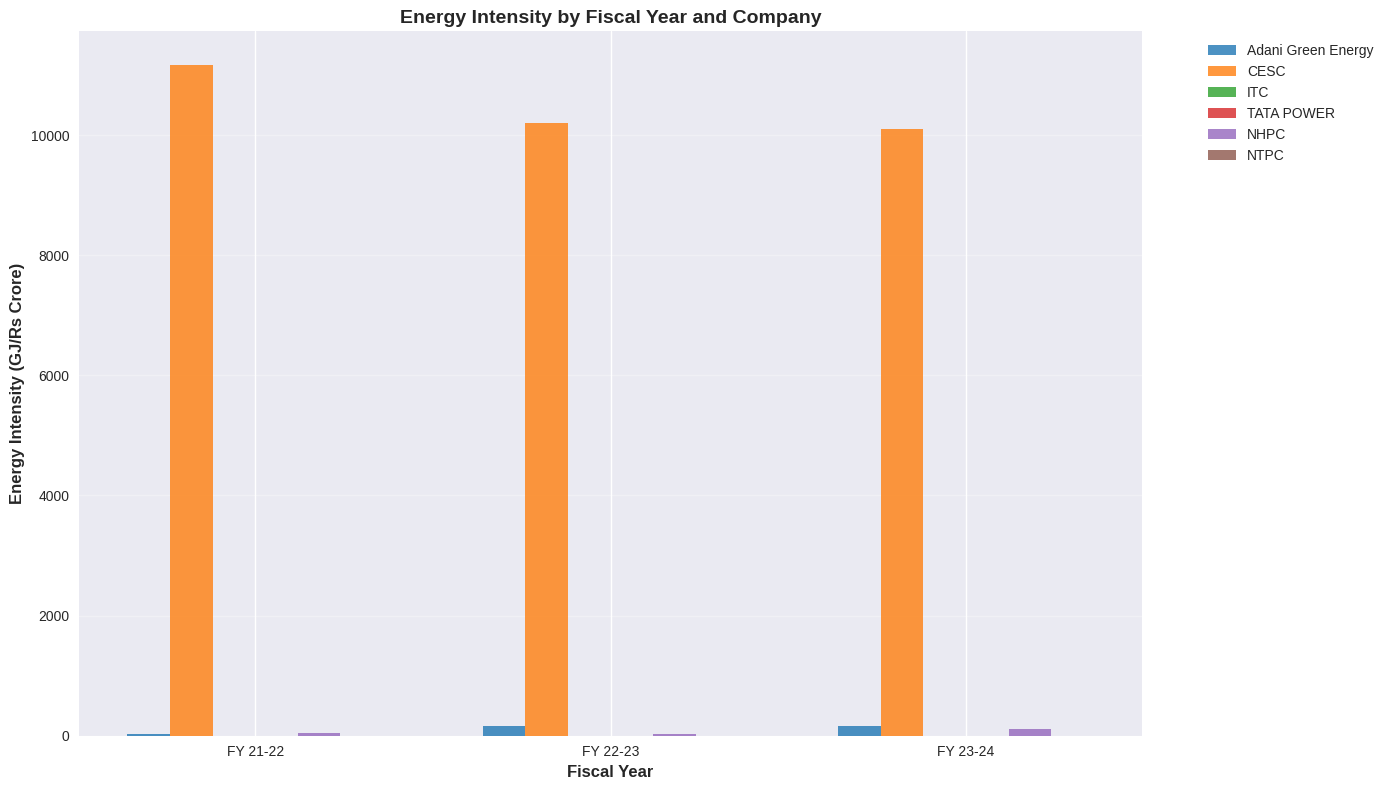


Creating GHG Emissions Chart...


/tmp/ipython-input-4-1869079270.py:147: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


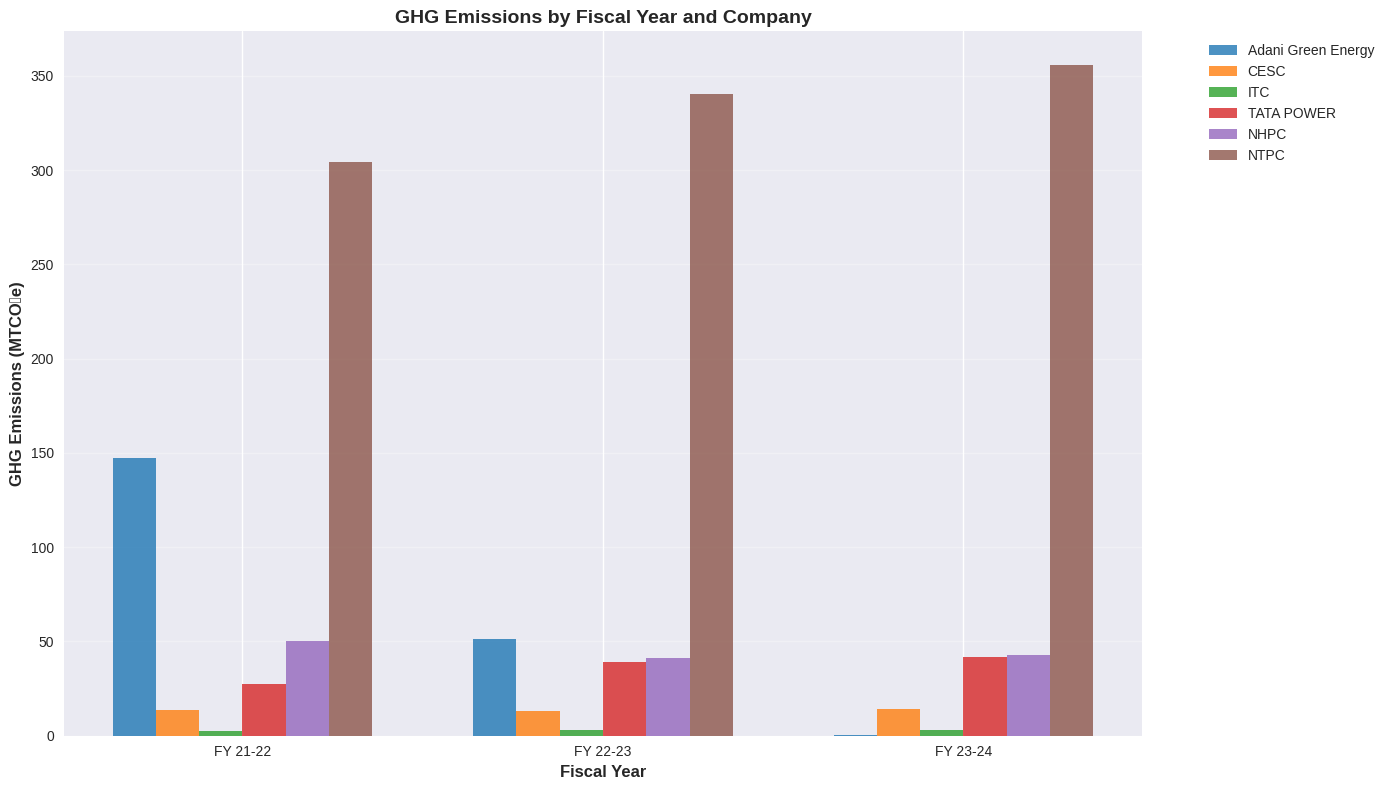


Creating GHG Emission Intensity Chart...


/tmp/ipython-input-4-1869079270.py:173: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


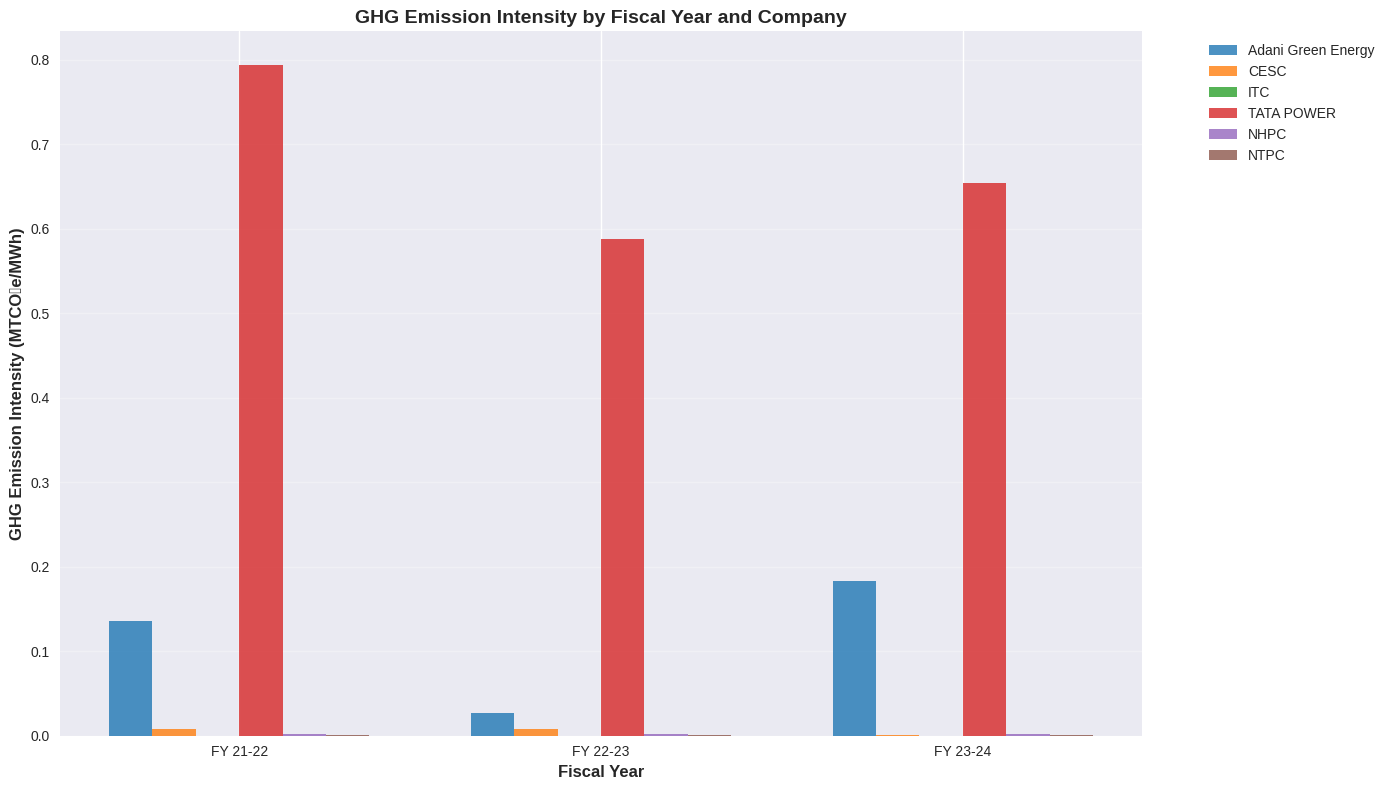


Creating Energy Savings Chart...


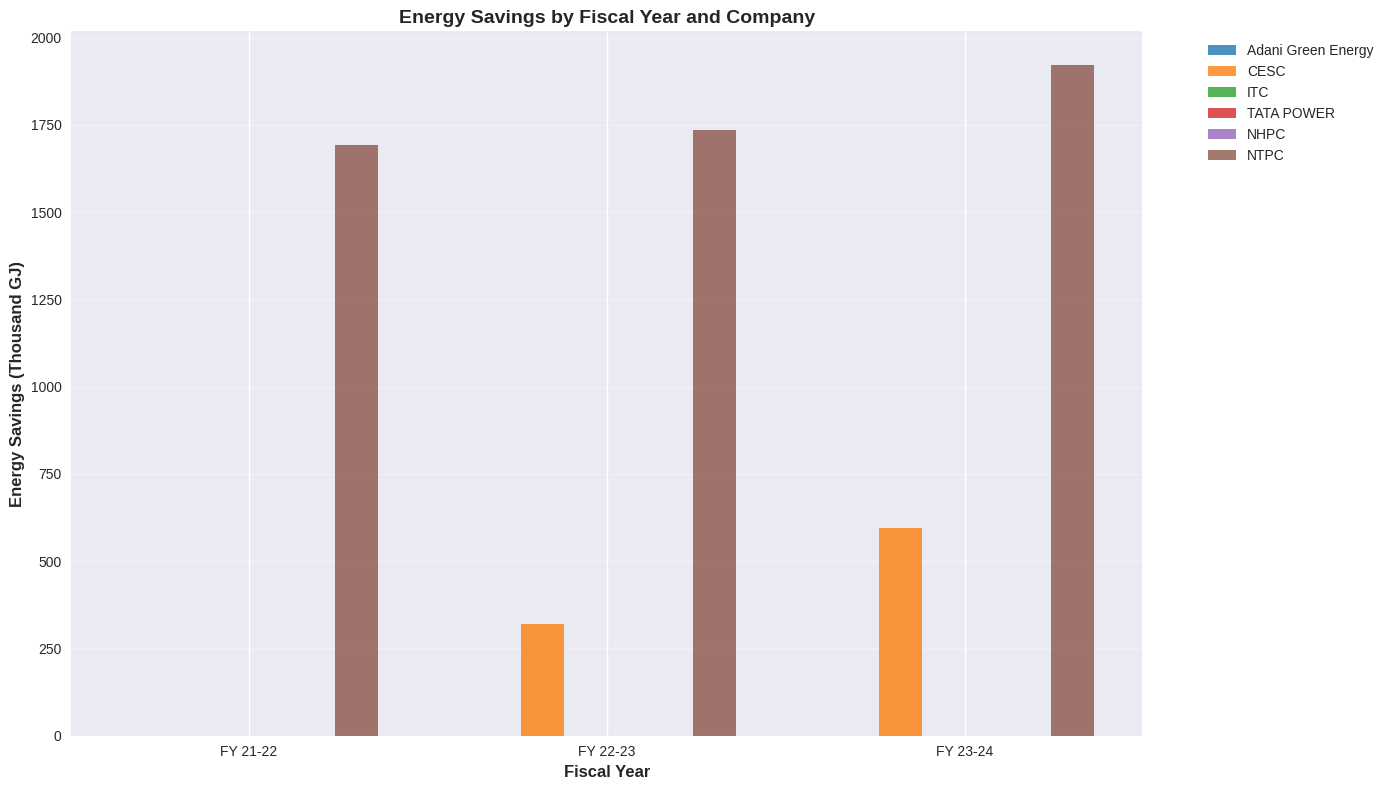


Creating Energy Generation Chart...


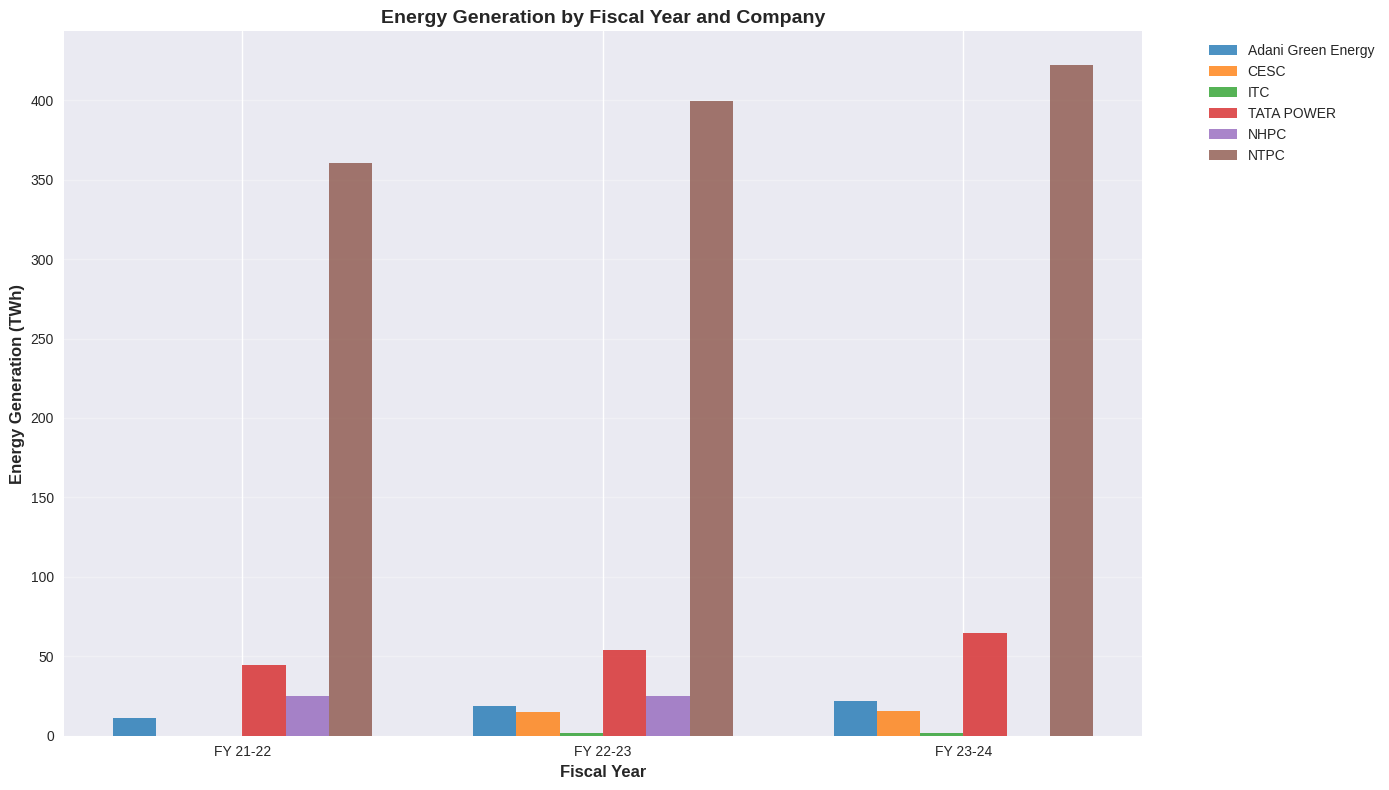


Creating Renewable Generation Chart...


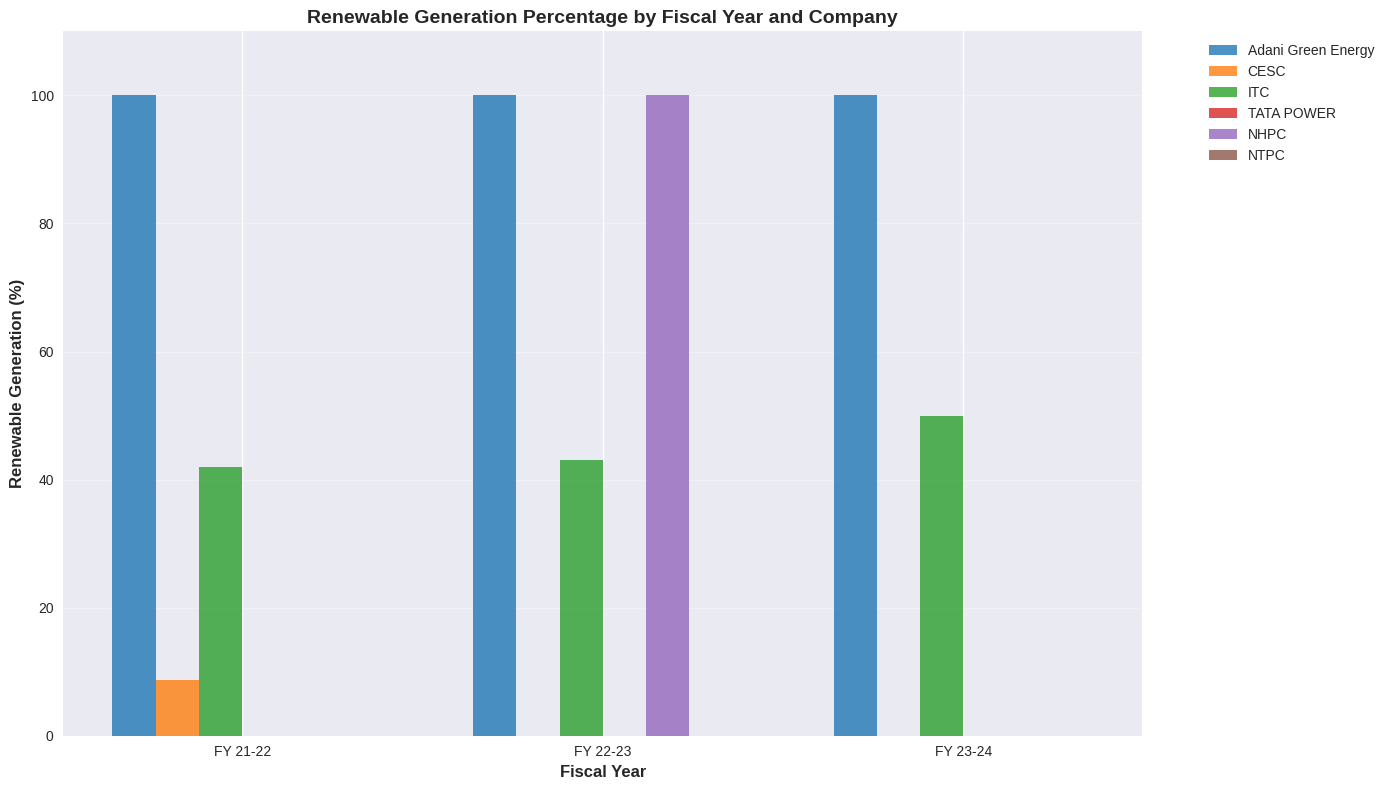


Creating Fly Ash Utilization Chart...


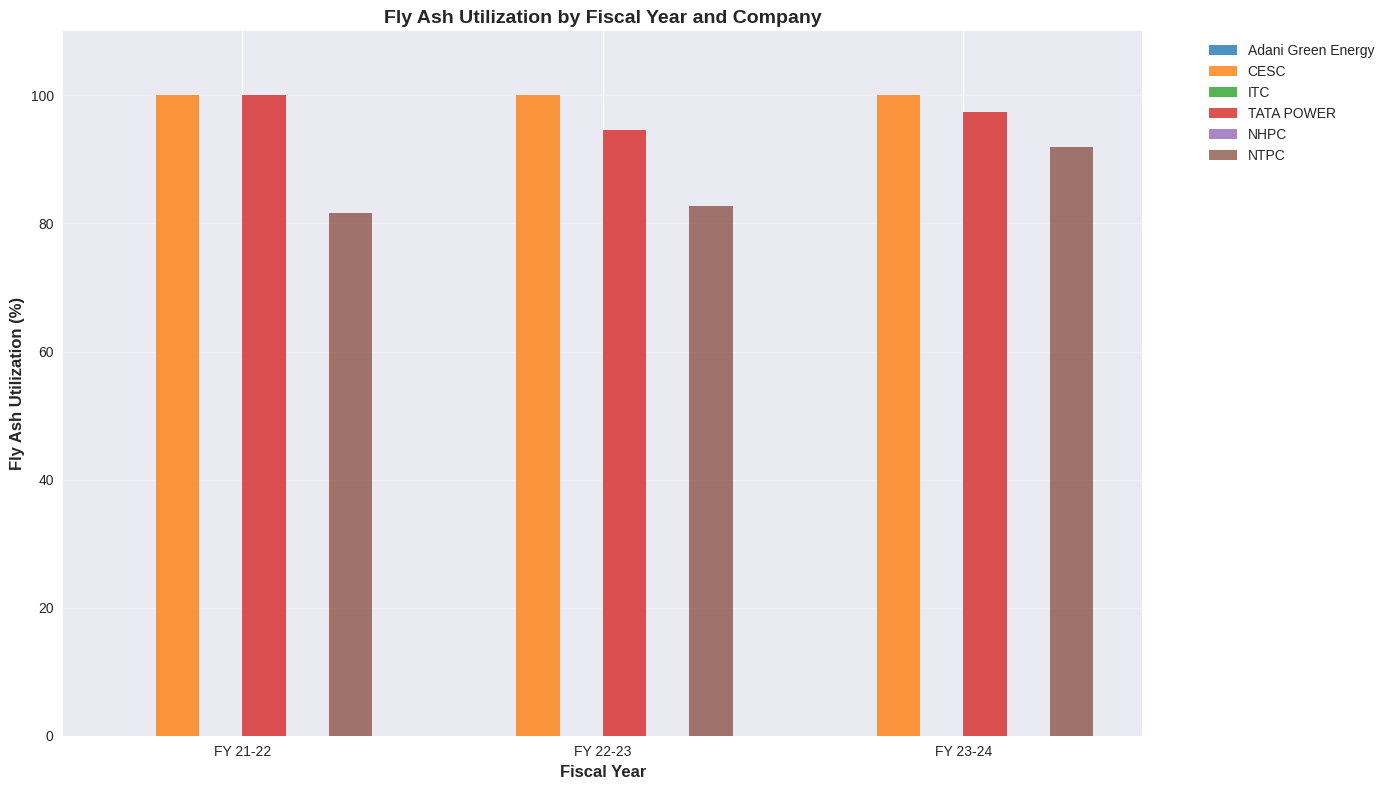


All charts have been generated successfully!

Key Insights from FY-based grouping:
1. Year-over-year trends are now clearly visible for each company
2. Adani Green Energy shows dramatic reduction in GHG emissions from FY22 to FY24
3. Most companies show increasing energy consumption and generation over time
4. CESC and NTPC have introduced energy savings programs in recent years
5. Renewable energy adoption varies significantly across companies and years


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

# Define companies and fiscal years
companies = ['Adani Green Energy', 'CESC', 'ITC', 'TATA POWER', 'NHPC', 'NTPC']
fiscal_years = ['FY 21-22', 'FY 22-23', 'FY 23-24']

# Define colors for each company
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# 1. Specific Water Consumption (kL/MWh)
print("Creating Specific Water Consumption Chart...")
water_data = {
    'Adani Green Energy': [0.025, 0.024, 0.027],
    'CESC': [9.42, 9.65, 9.15],  # Using KOL values
    'ITC': [27.75, np.nan, 20.24],
    'TATA POWER': [np.nan, 5.07, 5.036],
    'NHPC': [np.nan, 180.11, 177.49],
    'NTPC': [2.76, 2.69, 2.68]
}

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(fiscal_years))
width = 0.12

for i, company in enumerate(companies):
    values = [water_data[company][j] if not pd.isna(water_data[company][j]) else 0
              for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Specific Water Consumption (kL/MWh)', fontsize=12, fontweight='bold')
ax.set_title('Specific Water Consumption by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Coal Consumption (Million Tonnes)
print("\nCreating Coal Consumption Chart...")
coal_data = {
    'Adani Green Energy': [0, 0, 0],
    'CESC': [3.24, 3.95, 4.36],
    'ITC': [0, 0, 0],
    'TATA POWER': [20.3, 21.5, 26.4],
    'NHPC': [0, 0, 0],
    'NTPC': [225.41, 247.86, 264.52]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [coal_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Coal Consumption (Million Tonnes)', fontsize=12, fontweight='bold')
ax.set_title('Coal Consumption by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Energy Consumption (GJ) - in billions for better visualization
print("\nCreating Energy Consumption Chart...")
energy_consumption_data = {
    'Adani Green Energy': [1.47, 124.46, 133.29],  # in billions
    'CESC': [1400.41, 1452.68, 1545.00],  # in billions
    'ITC': [243.94, 268.85, 263.83],  # in billions
    'TATA POWER': [2780.72, 4089.48, 5056.71],  # in billions
    'NHPC': [36.07, 34.52, 98.10],  # in billions
    'NTPC': [33857.63, 37426.95, 39415.82]  # in billions
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [energy_consumption_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Energy Consumption (Billion GJ)', fontsize=12, fontweight='bold')
ax.set_title('Energy Consumption by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Energy Intensity (GJ/Rs Crore)
print("\nCreating Energy Intensity Chart...")
energy_intensity_data = {
    'Adani Green Energy': [28.58, 159.73, 156.4],
    'CESC': [11169.25, 10202.5, 10107.82],
    'ITC': [0, 0, 0],
    'TATA POWER': [0.00065, 0.00073, 0.000821],
    'NHPC': [43.17, 36.96, 116.72],
    'NTPC': [0, 0, 0]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [energy_intensity_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Energy Intensity (GJ/Rs Crore)', fontsize=12, fontweight='bold')
ax.set_title('Energy Intensity by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. GHG Emissions (MTCO2e)
print("\nCreating GHG Emissions Chart...")
ghg_data = {
    'Adani Green Energy': [147.26, 51.28, 0.27],
    'CESC': [13.51, 13.18, 14.32],
    'ITC': [2.673, 3.172, 3.084],
    'TATA POWER': [27.616, 38.868, 41.55],
    'NHPC': [50.189, 41.381, 42.814],
    'NTPC': [304.46, 340.14, 355.81]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [ghg_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('GHG Emissions (MTCO₂e)', fontsize=12, fontweight='bold')
ax.set_title('GHG Emissions by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. GHG Emission Intensity (MTCO2e/MWh)
print("\nCreating GHG Emission Intensity Chart...")
ghg_intensity_data = {
    'Adani Green Energy': [0.1353, 0.02707, 0.18323],
    'CESC': [0.008011, 0.007629, 0.0006627],
    'ITC': [0, 0, 0],
    'TATA POWER': [0.794, 0.5881, 0.6539],
    'NHPC': [0.00202, 0.00166, 0.00172],
    'NTPC': [0.000844, 0.000852, 0.000842]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [ghg_intensity_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('GHG Emission Intensity (MTCO₂e/MWh)', fontsize=12, fontweight='bold')
ax.set_title('GHG Emission Intensity by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Energy Savings (GJ) - in thousands for better visualization
print("\nCreating Energy Savings Chart...")
energy_savings_data = {
    'Adani Green Energy': [0, 0, 0],
    'CESC': [0, 319.96, 594.16],  # in thousands
    'ITC': [0, 0, 0],
    'TATA POWER': [0, 0, 0],
    'NHPC': [0, 0, 0],
    'NTPC': [1693.5, 1735.5, 1921.9]  # in thousands
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [energy_savings_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Energy Savings (Thousand GJ)', fontsize=12, fontweight='bold')
ax.set_title('Energy Savings by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Energy Generation (TWh)
print("\nCreating Energy Generation Chart...")
energy_generation_data = {
    'Adani Green Energy': [10.88, 18.94, 21.845],
    'CESC': [0, 14.777, 15.725],
    'ITC': [0, 1.559, 1.796],
    'TATA POWER': [44.383, 54.052, 64.600],
    'NHPC': [24.855, 24.907, 0],
    'NTPC': [360.51, 399.31, 422.22]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [energy_generation_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Energy Generation (TWh)', fontsize=12, fontweight='bold')
ax.set_title('Energy Generation by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Renewable Generation (%)
print("\nCreating Renewable Generation Chart...")
renewable_data = {
    'Adani Green Energy': [100, 100, 100],
    'CESC': [8.7, 0, 0],
    'ITC': [42, 43, 50],
    'TATA POWER': [0, 0, 0],
    'NHPC': [0, 100, 0],
    'NTPC': [0, 0, 0]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [renewable_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Renewable Generation (%)', fontsize=12, fontweight='bold')
ax.set_title('Renewable Generation Percentage by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 110)
plt.tight_layout()
plt.show()

# 10. Fly Ash Utilization (%)
print("\nCreating Fly Ash Utilization Chart...")
fly_ash_data = {
    'Adani Green Energy': [0, 0, 0],
    'CESC': [100, 100, 100],
    'ITC': [0, 0, 0],
    'TATA POWER': [100, 94.6, 97.4],
    'NHPC': [0, 0, 0],
    'NTPC': [81.67, 82.75, 92]
}

fig, ax = plt.subplots(figsize=(14, 8))
for i, company in enumerate(companies):
    values = [fly_ash_data[company][j] for j in range(len(fiscal_years))]
    bars = ax.bar(x + i*width, values, width, label=company, color=colors[i], alpha=0.8)

ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Fly Ash Utilization (%)', fontsize=12, fontweight='bold')
ax.set_title('Fly Ash Utilization by Fiscal Year and Company', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(fiscal_years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 110)
plt.tight_layout()
plt.show()

print("\nAll charts have been generated successfully!")
print("\nKey Insights from FY-based grouping:")
print("1. Year-over-year trends are now clearly visible for each company")
print("2. Adani Green Energy shows dramatic reduction in GHG emissions from FY22 to FY24")
print("3. Most companies show increasing energy consumption and generation over time")
print("4. CESC and NTPC have introduced energy savings programs in recent years")
print("5. Renewable energy adoption varies significantly across companies and years")

Creating Grouped Bar Charts with Fiscal Year as Primary Grouping


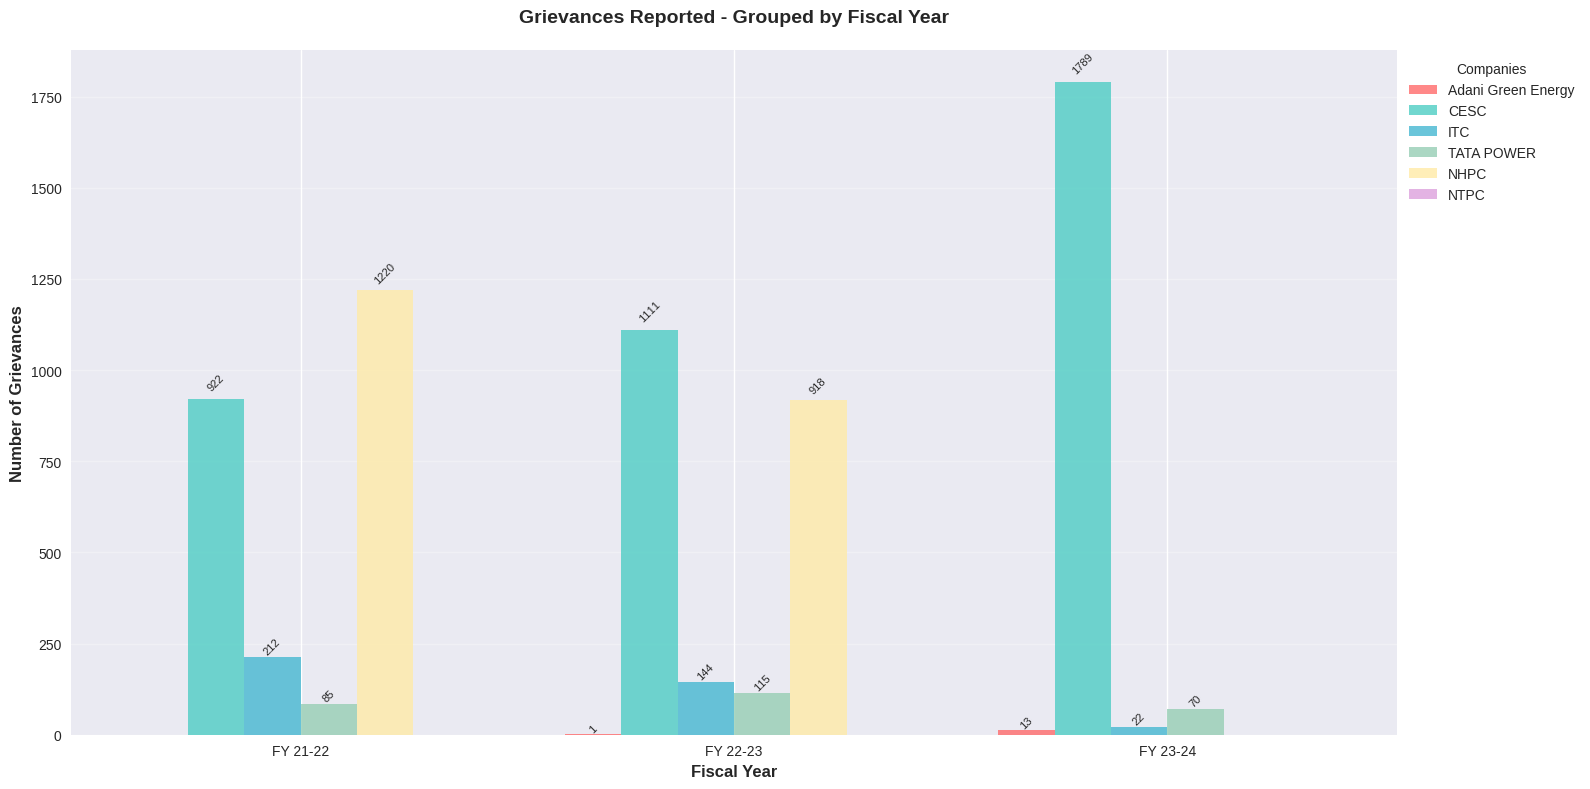

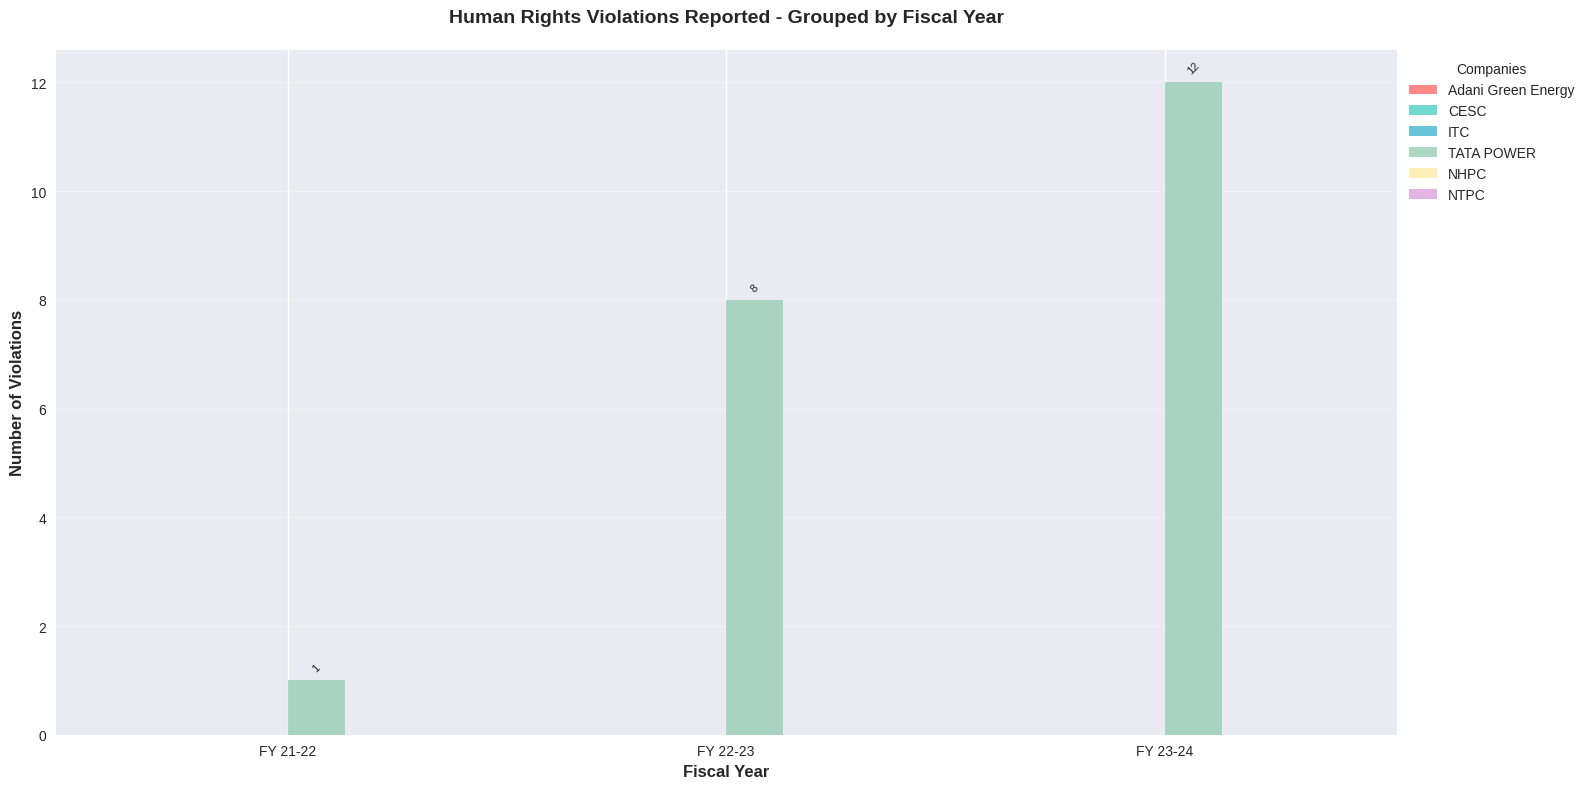

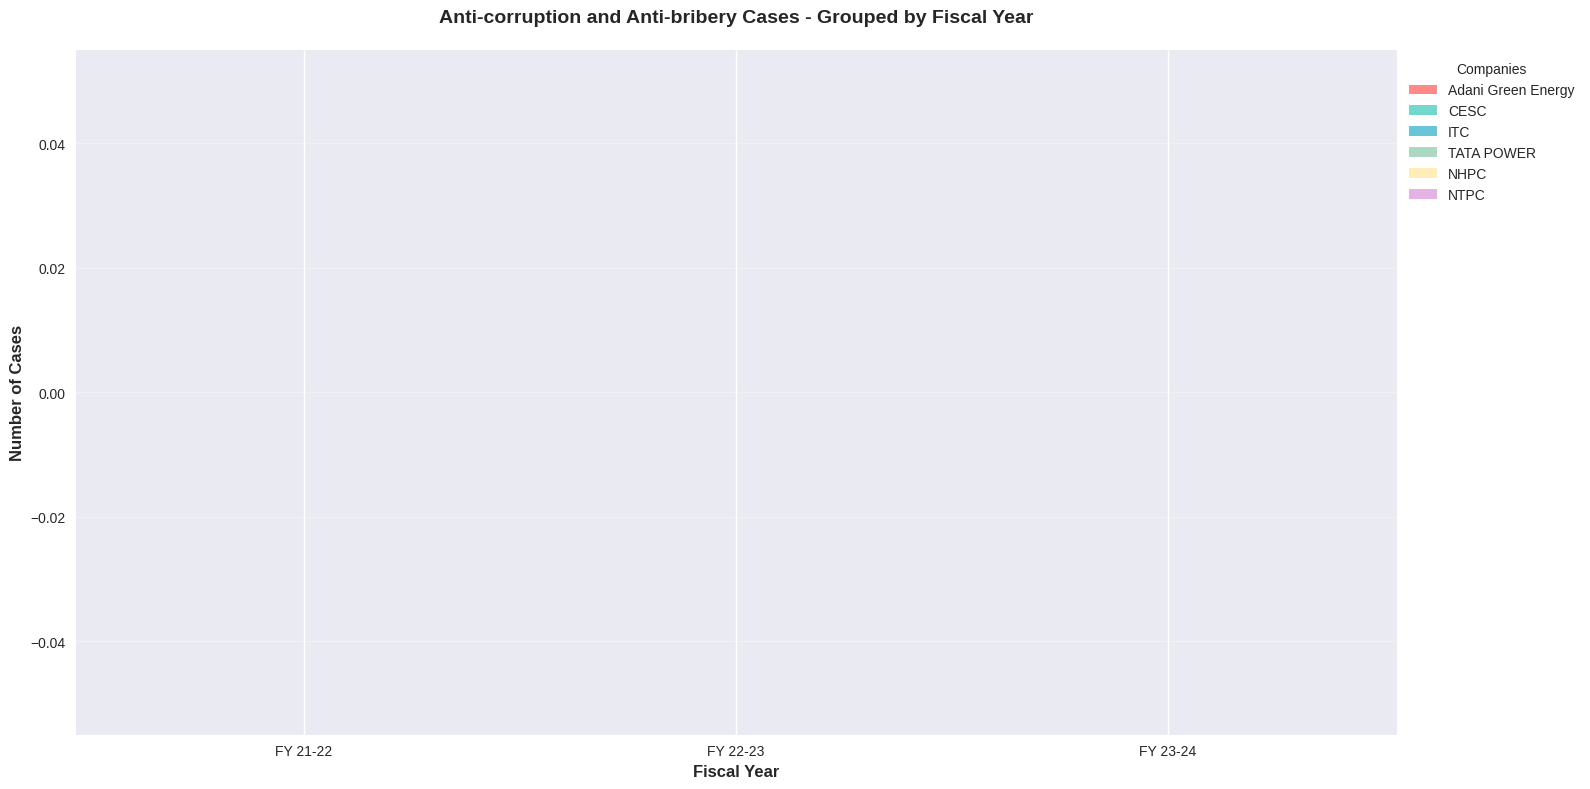

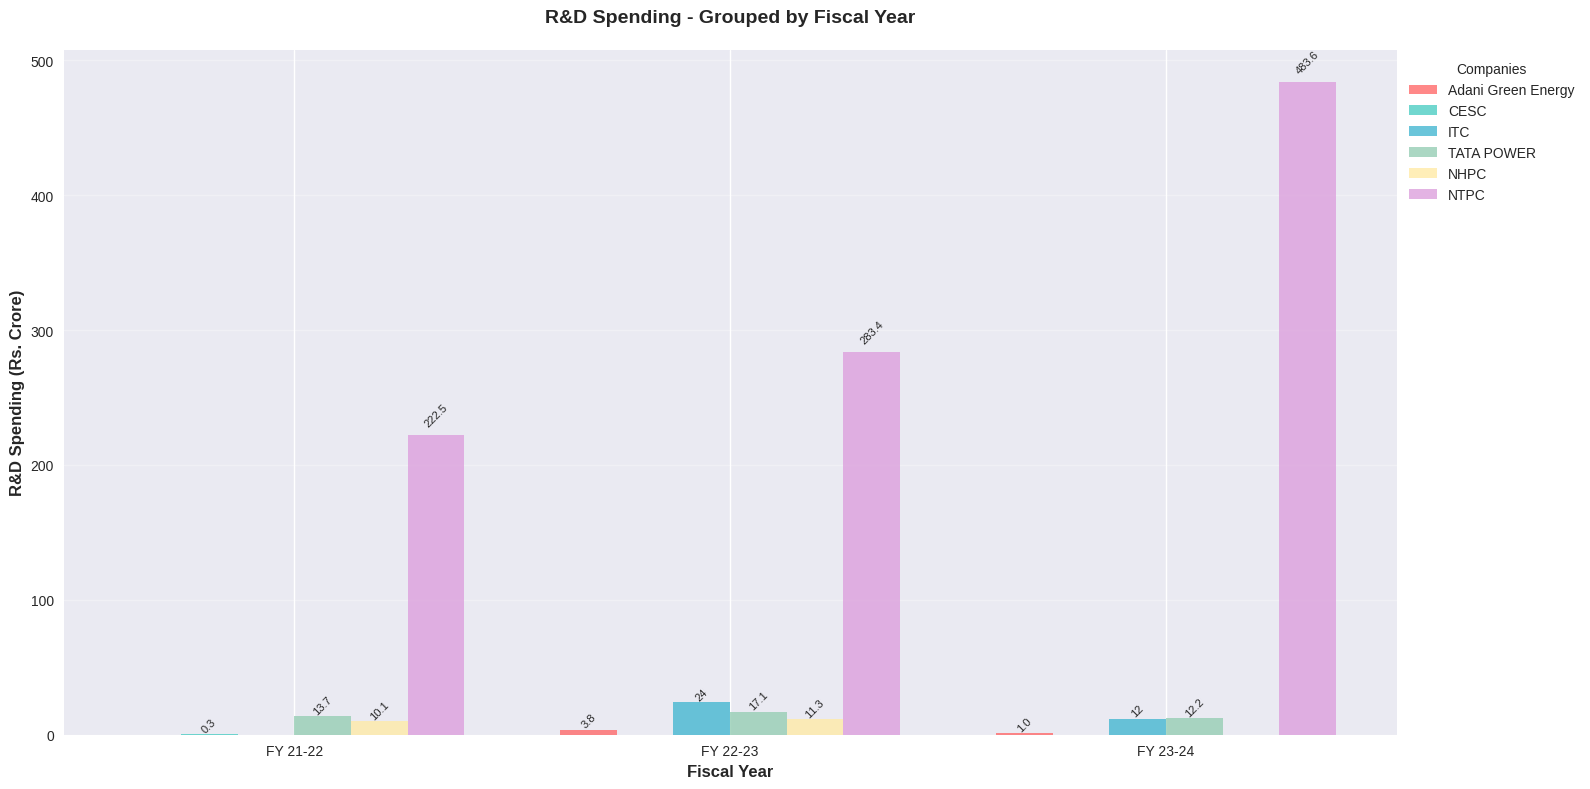

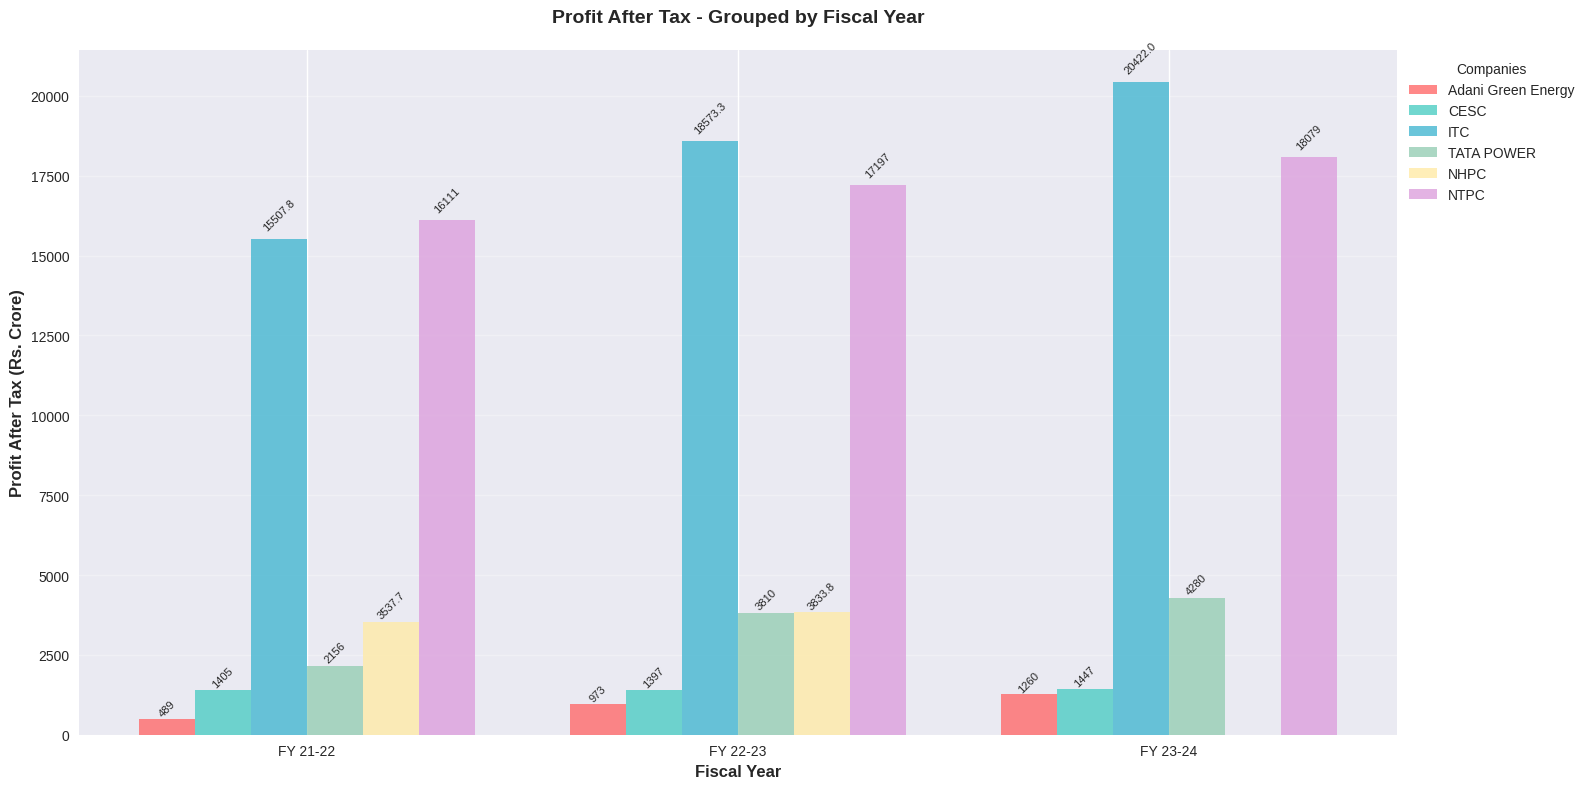

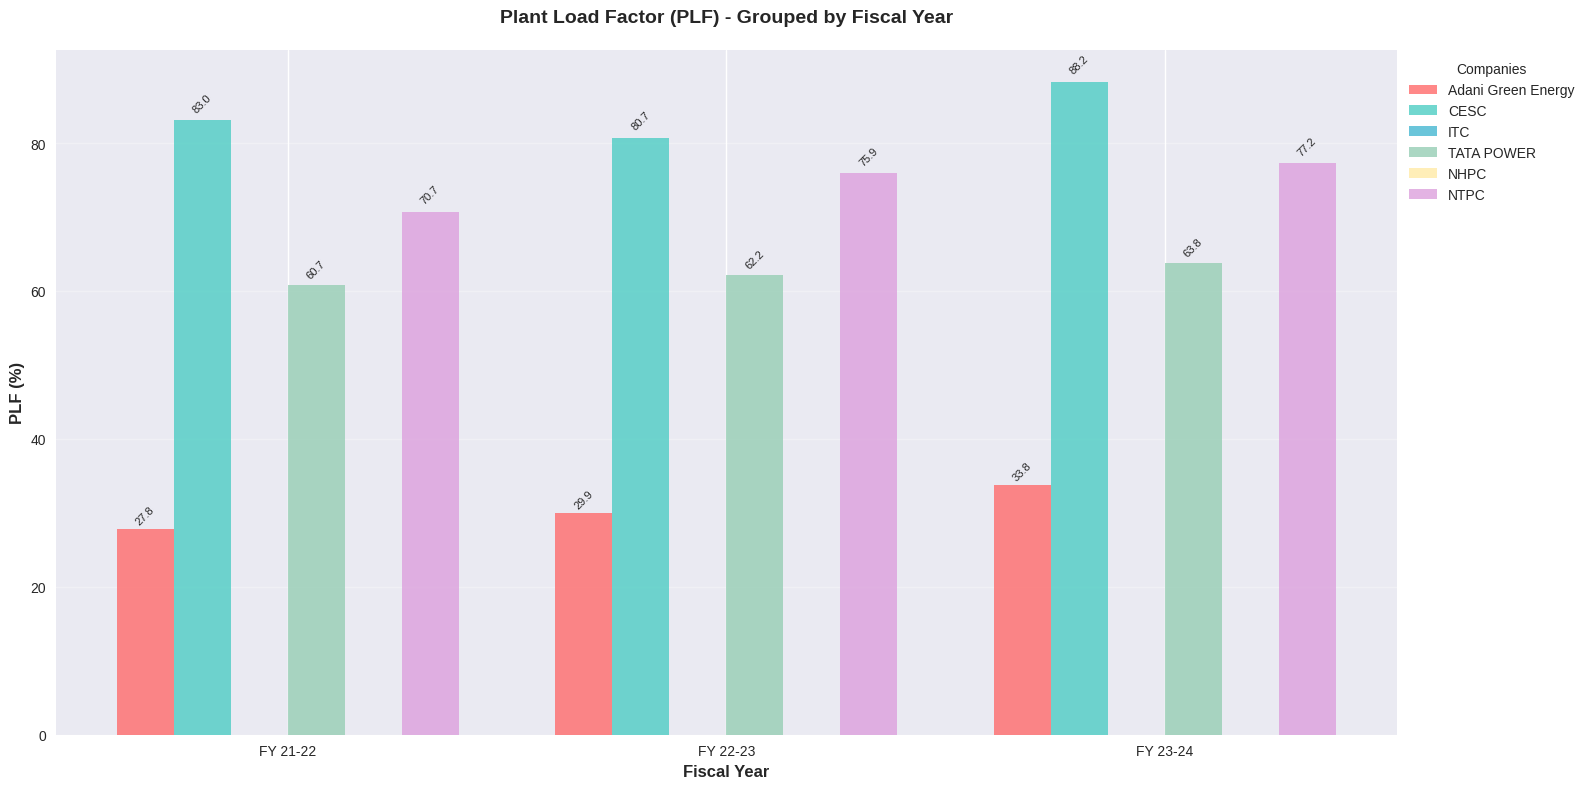

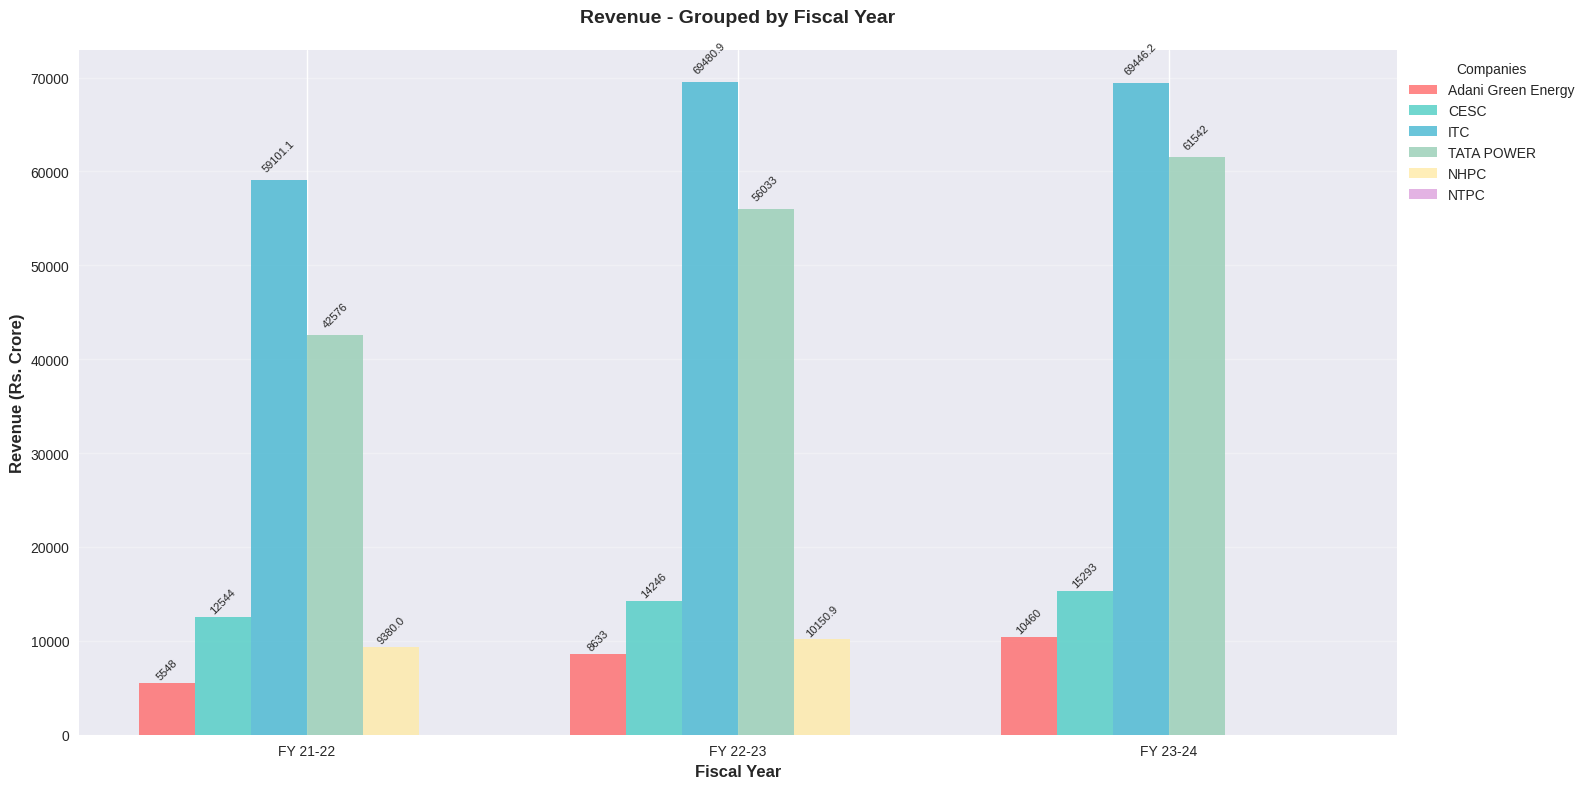


All charts have been generated successfully!

Chart Structure:
- PRIMARY GROUPING: Fiscal Year (FY 21-22, FY 22-23, FY 23-24)
- SECONDARY GROUPING: Companies (shown as different colored bars within each FY)
- Each FY group contains bars for all 6 companies
- Missing data points are handled by showing gaps in the visualization
- Value labels are displayed on bars for better readability


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

# Define companies and fiscal years
companies = ['Adani Green Energy', 'CESC', 'ITC', 'TATA POWER', 'NHPC', 'NTPC']
fiscal_years = ['FY 21-22', 'FY 22-23', 'FY 23-24']

# Data for each parameter (organized by FY, then by company)
# 1. Grievances Reported
grievances_data = {
    'FY 21-22': [0, 922, 212, 85, 1220, np.nan],
    'FY 22-23': [1, 1111, 144, 115, 918, np.nan],
    'FY 23-24': [13, 1789, 22, 70, np.nan, np.nan]
}

# 2. Human Rights Violations Reported
hr_violations_data = {
    'FY 21-22': [0, 0, np.nan, 1, 0, np.nan],
    'FY 22-23': [0, 0, np.nan, 8, 0, np.nan],
    'FY 23-24': [0, 0, np.nan, 12, 0, np.nan]
}

# 3. Anti-corruption and Anti-bribery Reported
anti_corruption_data = {
    'FY 21-22': [0, np.nan, np.nan, 0, 0, np.nan],
    'FY 22-23': [0, np.nan, np.nan, 0, 0, np.nan],
    'FY 23-24': [0, 0, np.nan, 0, 0, np.nan]
}

# 4. R&D Spending (Rs. Crore)
rd_spending_data = {
    'FY 21-22': [np.nan, 0.34, np.nan, 13.7, 10.07, 222.48],
    'FY 22-23': [3.76, np.nan, 24, 17.06, 11.30, 283.45],
    'FY 23-24': [0.96, np.nan, 12, 12.2, np.nan, 483.63]
}

# 5. Profit After Tax (Rs. Crore)
profit_data = {
    'FY 21-22': [489, 1405, 15507.83, 2156, 3537.71, 16111],
    'FY 22-23': [973, 1397, 18573.31, 3810, 3833.79, 17197],
    'FY 23-24': [1260, 1447, 20421.97, 4280, np.nan, 18079]
}

# 6. PLF (%) - Plant Load Factor
plf_data = {
    'FY 21-22': [27.8, 83.05, np.nan, 60.74, np.nan, 70.74],  # CESC: avg of BBGS(84.7) and Haldia(81.4)
    'FY 22-23': [29.93, 80.7, np.nan, 62.19, np.nan, 75.90],  # CESC: avg of BBGS(81.1) and Haldia(80.3)
    'FY 23-24': [33.8, 88.2, np.nan, 63.81, np.nan, 77.25]   # CESC: avg of BBGS(88.4) and Haldia(88.0) #[60.74, 62.19, 63.81] Tata Power
}
# 7. Revenue (Rs. Crore)
revenue_data = {
    'FY 21-22': [5548, 12544, 59101.09, 42576, 9379.98, np.nan],
    'FY 22-23': [8633, 14246, 69480.89, 56033, 10150.9, np.nan],
    'FY 23-24': [10460, 15293, 69446.2, 61542, np.nan, np.nan]
}

def create_fy_grouped_bar_chart(data, title, ylabel, filename=None):
    """Create a grouped bar chart with FY as primary grouping"""
    fig, ax = plt.subplots(figsize=(16, 8))

    # Prepare data for plotting
    x = np.arange(len(fiscal_years))
    width = 0.13  # Width of bars (reduced to fit 6 companies)

    # Color palette for companies
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

    # Create bars for each company
    for i, company in enumerate(companies):
        values = []
        for fy in fiscal_years:
            if fy in data and len(data[fy]) > i:
                values.append(data[fy][i])
            else:
                values.append(np.nan)

        # Handle NaN values by replacing with 0 for plotting, but keep track of original
        plot_values = [0 if pd.isna(v) else v for v in values]
        bars = ax.bar(x + i * width, plot_values, width, label=company,
                     alpha=0.8, color=colors[i])

        # Add value labels on bars (skip NaN values)
        for j, (bar, original_val) in enumerate(zip(bars, values)):
            if not pd.isna(original_val) and original_val != 0:
                height = bar.get_height()
                # Position text based on bar height
                text_y = height + max(plot_values) * 0.01
                ax.text(bar.get_x() + bar.get_width()/2., text_y,
                       f'{original_val:.1f}' if isinstance(original_val, float) else str(int(original_val)),
                       ha='center', va='bottom', fontsize=8, rotation=45)

    # Customize the chart
    ax.set_xlabel('Fiscal Year', fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x + width * 2.5)  # Center the x-axis labels
    ax.set_xticklabels(fiscal_years)
    ax.legend(title='Companies', loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', alpha=0.3)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

# Create all charts with FY as primary grouping
print("Creating Grouped Bar Charts with Fiscal Year as Primary Grouping")
print("=" * 65)

# Chart 1: Grievances Reported
create_fy_grouped_bar_chart(
    grievances_data,
    'Grievances Reported - Grouped by Fiscal Year',
    'Number of Grievances'
)

# Chart 2: Human Rights Violations Reported
create_fy_grouped_bar_chart(
    hr_violations_data,
    'Human Rights Violations Reported - Grouped by Fiscal Year',
    'Number of Violations'
)

# Chart 3: Anti-corruption and Anti-bribery Reported
create_fy_grouped_bar_chart(
    anti_corruption_data,
    'Anti-corruption and Anti-bribery Cases - Grouped by Fiscal Year',
    'Number of Cases'
)

# Chart 4: R&D Spending
create_fy_grouped_bar_chart(
    rd_spending_data,
    'R&D Spending - Grouped by Fiscal Year',
    'R&D Spending (Rs. Crore)'
)

# Chart 5: Profit After Tax
create_fy_grouped_bar_chart(
    profit_data,
    'Profit After Tax - Grouped by Fiscal Year',
    'Profit After Tax (Rs. Crore)'
)

# Chart 6: Plant Load Factor (PLF)
create_fy_grouped_bar_chart(
    plf_data,
    'Plant Load Factor (PLF) - Grouped by Fiscal Year',
    'PLF (%)'
)

# Chart 7: Revenue - Add this after the PLF chart
create_fy_grouped_bar_chart(
    revenue_data,
    'Revenue - Grouped by Fiscal Year',
    'Revenue (Rs. Crore)'
)

print("\nAll charts have been generated successfully!")
print("\nChart Structure:")
print("- PRIMARY GROUPING: Fiscal Year (FY 21-22, FY 22-23, FY 23-24)")
print("- SECONDARY GROUPING: Companies (shown as different colored bars within each FY)")
print("- Each FY group contains bars for all 6 companies")
print("- Missing data points are handled by showing gaps in the visualization")
print("- Value labels are displayed on bars for better readability")